# 1. Iris dataset

### 1. Load dateset & check structure

In [2]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [3]:
iris.head()  

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
print(iris['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 2. Calculating descriptive statics

In [9]:
group_stats = iris.groupby('species')['petal_length'].describe()
print(group_stats)

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9


In [10]:
group_counts = iris['species'].value_counts()
print("\n[그룹별 데이터 개수]")
print(group_counts)


[그룹별 데이터 개수]
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 3. Visualization

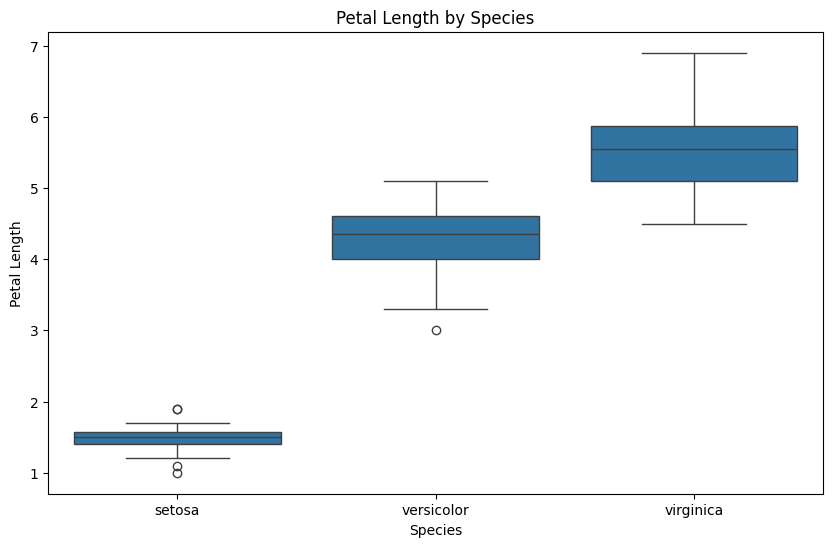

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')
plt.show()

- **Virginica**는 전체적으로 가장 긴 Petal Length를 보이며, 중앙값 또한 높다.
- **Versicolor**는 중간 정도의 길이 분포를 가지며, 이상치가 적다.
- **Setosa**는 가장 짧은 Petal Length를 가지고 몇몇 이상치들이 보이며, 분포의 범위도 작다.

### 4.  Normality test

In [4]:
from scipy import stats

species_list = iris['species'].unique()

for species in species_list:
    stat, p = stats.shapiro(iris[iris['species'] == species]['petal_length'])
    print(f"{species:10s} | W-statistic: {stat:.4f} | p-value: {p:.4f} | {'Normality satisfied' if p >= 0.05 else 'Normality violated'}")

setosa     | W-statistic: 0.9550 | p-value: 0.0548 | Normality satisfied
versicolor | W-statistic: 0.9660 | p-value: 0.1585 | Normality satisfied
virginica  | W-statistic: 0.9622 | p-value: 0.1098 | Normality satisfied


Since all p-values are greater than 0.05, we **fail to reject the null hypothesis** for all groups.  
Therefore, the assumption of normality is satisfied for each species.

### 5. Levene's Test 

**Null Hypothesis (H₀)**:
The variance of petal length is the same across all three species.
(Var(setosa) = Var(versicolor) = Var(virginica))

**Alternative Hypothesis (H₁)**:
At least one species has a different variance of petal length.



In [5]:
from scipy.stats import levene

setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal_length = iris[iris['species'] == 'virginica']['petal_length']

stat, p = levene(setosa_petal_length, versicolor_petal_length, virginica_petal_length)
print(f"Levene's Test: W-statistic = {stat:.4f}, p-value = {p:.4f}")
if p < 0.05:
    print("violation of homogeneity of variance")
else:
    print("homogeneity of variance satisfied")

Levene's Test: W-statistic = 19.4803, p-value = 0.0000
violation of homogeneity of variance


Since the p-value is **less than 0.05**, we reject the null hypothesis.  
Therefore, the assumption of **homogeneity of variance is violated**.

### 6. Hypothesis setting

**Null Hypothesis (H₀)**:
The mean petal length is the same across all three species.
(μ_setosa = μ_versicolor = μ_virginica)

**Alternative Hypothesis (H₁)**:
At least one species has a different mean petal length.



### 7. ANOVA Implement

In [6]:
from scipy.stats import f_oneway

setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal_length = iris[iris['species'] == 'virginica']['petal_length']
stat, p = f_oneway(setosa_petal_length, versicolor_petal_length, virginica_petal_length)
print(f"ANOVA: F-statistic = {stat:.4f}, p-value = {p:.4f}")

if p < 0.05:
    print("Reject the null hypothesis: At least one species has a different mean petal length.")
else:
    print("Fail to reject the null hypothesis: The mean petal length is the same across all species.")

ANOVA: F-statistic = 1180.1612, p-value = 0.0000
Reject the null hypothesis: At least one species has a different mean petal length.


Since the p-value is **less than 0.05**, we reject the null hypothesis. 

### 8. Tukey’s HSD

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_result = pairwise_tukeyhsd(endog=iris['petal_length'], groups=iris['species'], alpha=0.05)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


All three pairwise comparisons (setosa vs versicolor, setosa vs virginica, versicolor vs virginica) yielded significant results (p < 0.05).  
This confirms that the mean petal length differs significantly across **all species groups**.

### 9. Summarizing Result

In this analysis, I investigated whether the mean petal length significantly differs across the three Iris species using standard statistical methods.
The petal length of Iris flowers significantly differs depending on the species.  
**Setosa** has the shortest petals, **Virginica** the longest, and **Versicolor** lies in between — all differences are statistically significant.

# 2. Credit Card fraud detection

### 1. Data load & overview

In [1]:
import pandas as pd

df = pd.read_csv('creditcard.csv')

In [2]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
class_counts = df['Class'].value_counts()
print("\n[Class distribution]")
print(class_counts)
print("\n[Class distribution percentage]")
print(class_counts / len(df) * 100)


[Class distribution]
Class
0    284315
1       492
Name: count, dtype: int64

[Class distribution percentage]
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


### 2. Sampling

In [6]:
fraud_samples = df[df['Class'] == 1]
normal_samples = df[df['Class'] == 0].sample(n=10000, random_state=42)
sampled_df = pd.concat([fraud_samples, normal_samples], axis=0)
df_sampled = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True) 

class_counts_sampled = df_sampled['Class'].value_counts()
print("\n[Sampled Class distribution]")
print(class_counts_sampled)
print("\n[Sampled Class distribution percentage]")
print(class_counts_sampled / len(df_sampled) * 100)


[Sampled Class distribution]
Class
0    10000
1      492
Name: count, dtype: int64

[Sampled Class distribution percentage]
Class
0    95.310713
1     4.689287
Name: count, dtype: float64


### 3. Data preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df_sampled['Amount_Scaled'] = scalar.fit_transform(df_sampled[['Amount']])

df_sampled.drop(columns=['Amount'], inplace=True)

X = df_sampled.drop(columns=['Class'])
y = df_sampled['Class']

print("\n[Feature matrix X]")
print(X.head())
print("\n[Target vector y]")
print(y.head())


[Feature matrix X]
       Time        V1        V2        V3        V4        V5        V6  \
0   42801.0  0.340725 -1.225499 -0.745517  1.026148  0.654991  2.089517   
1   75825.0  1.012672  0.116840  0.470676  1.294378  0.364923  1.200693   
2   75126.0  0.882585 -0.154542  0.400071  1.414269 -0.240769  0.080165   
3   71499.0  1.099810  0.114129  1.386525  2.530134 -0.675278  0.640243   
4  140413.0 -2.006545 -0.963629 -0.943202  2.867748  1.774236 -1.073671   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.296109  0.515619 -0.002562  ...  0.451794  0.299103  0.238042 -0.466934   
1 -0.157411  0.396090  0.178674  ... -0.288865  0.013154  0.431855  0.076186   
2  0.176762  0.043818 -0.111040  ...  0.099676  0.042784  0.095247 -0.161705   
3 -0.734736  0.391948  0.031519  ... -0.203043 -0.066679 -0.129717  0.002909   
4 -0.290067 -0.333631  0.451643  ... -0.428399 -0.099571  0.806569 -1.513377   

        V24       V25       V26       V27       

### 4. Train-Test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n Train set distribution")
print(y_train.value_counts())
print("\n Train set percentage")
print(y_train.value_counts() / len(y_train) * 100)
print("\n Test set distribution")
print(y_test.value_counts())
print("\n Test set percentage")
print(y_test.value_counts() / len(y_test) * 100)


 Train set distribution
Class
0    7999
1     394
Name: count, dtype: int64

 Train set percentage
Class
0    95.305612
1     4.694388
Name: count, dtype: float64

 Test set distribution
Class
0    2001
1      98
Name: count, dtype: int64

 Test set percentage
Class
0    95.33111
1     4.66889
Name: count, dtype: float64


### 5. SMOTE

In [9]:
from imblearn.over_sampling import SMOTE  

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\n Prev distribution of training set")
print(y_train.value_counts())
print("\n After SMOTE distribution of training set")
print(y_train_smote.value_counts())



 Prev distribution of training set
Class
0    7999
1     394
Name: count, dtype: int64

 After SMOTE distribution of training set
Class
0    7999
1    7999
Name: count, dtype: int64


Reason for applying SMOTE: <br>
The dataset is highly imbalnced, with the fraudlent transactions (Class = 1) making up less than 5% of the data. <br>
Training a model on such data may cause it to bias toward the majority class and fail to learn meaningful pattern for fraud detection. <br>
**SMOTE** addresses this by generating sythetic samples for the minority class.

### 6. Model training

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, average_precision_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

pr_auc = average_precision_score(y_test, y_prob)
print(f"\nPR-AUC: {pr_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0     0.9916    0.9990    0.9953      2001
           1     0.9759    0.8265    0.8950        98

    accuracy                         0.9909      2099
   macro avg     0.9837    0.9128    0.9451      2099
weighted avg     0.9908    0.9909    0.9906      2099


PR-AUC: 0.9158


### 7. Final Evaluation

**Model result (Class 0 - Normal Transactions):**
- Precision: 0.9916  
- Recall: 0.9990  
- F1-score: 0.9953  
- Support: 2001

**Model result (Class 1 - Fraud Transactions):**
- Precision: 0.9759  
- Recall: 0.8265  
- F1-score: 0.8950  
- Support: 98  
- PR-AUC: 0.9158

The model meets all required performance criteria for both classes.